In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
import os
import struct
import numpy as np
from utils import *



In [24]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [25]:
from glow import thops
from glow import modules
from glow import models
from glow.config import JsonConfig
import cv2

In [26]:
# negative
path_total = '/home/hyshuai/workspace/dataset/images_background'

dataset_negative = []
for path_p in os.listdir(path_total):
        path_p_join = os.path.join(path_total,path_p)
        for path_c in os.listdir(path_p_join):
            path_real = os.path.join(path_p_join,path_c)
            class_name = path_real
            # image_paths = get_image_paths(path_real)
            images = get_images_frompath(path_real)
            print(class_name," : ",len(images))
            dataset_negative.append(ImageObject(class_name,images))

/home/hyshuai/workspace/dataset/images_background/Grantha/character42  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character08  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character13  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character35  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character39  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character11  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character19  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character01  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character04  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character10  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character07  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character28  :  20
/home/hyshuai/workspace/dataset/images_background/Grantha/character30  :  20

/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character04  :  20
/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character10  :  20
/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character07  :  20
/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character15  :  20
/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character05  :  20
/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character03  :  20
/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character12  :  20
/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character02  :  20
/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character17  :  20
/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character14  :  20
/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character18  :  20
/home/hysh

/home/hyshuai/workspace/dataset/images_background/Latin/character06  :  20
/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character08  :  20
/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character13  :  20
/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character11  :  20
/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character19  :  20
/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character01  :  20
/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character04  :  20
/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character10  :  20
/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character07  :  20
/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character28  :  20
/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character30  :  20
/home/hyshuai/workspace/dataset/images_background/Burme

/home/hyshuai/workspace/dataset/images_background/Cyrillic/character15  :  20
/home/hyshuai/workspace/dataset/images_background/Cyrillic/character22  :  20
/home/hyshuai/workspace/dataset/images_background/Cyrillic/character05  :  20
/home/hyshuai/workspace/dataset/images_background/Cyrillic/character03  :  20
/home/hyshuai/workspace/dataset/images_background/Cyrillic/character27  :  20
/home/hyshuai/workspace/dataset/images_background/Cyrillic/character12  :  20
/home/hyshuai/workspace/dataset/images_background/Cyrillic/character21  :  20
/home/hyshuai/workspace/dataset/images_background/Cyrillic/character32  :  20
/home/hyshuai/workspace/dataset/images_background/Cyrillic/character02  :  20
/home/hyshuai/workspace/dataset/images_background/Cyrillic/character24  :  20
/home/hyshuai/workspace/dataset/images_background/Cyrillic/character17  :  20
/home/hyshuai/workspace/dataset/images_background/Cyrillic/character23  :  20
/home/hyshuai/workspace/dataset/images_background/Cyrillic/chara

/home/hyshuai/workspace/dataset/images_background/N_Ko/character27  :  20
/home/hyshuai/workspace/dataset/images_background/N_Ko/character12  :  20
/home/hyshuai/workspace/dataset/images_background/N_Ko/character21  :  20
/home/hyshuai/workspace/dataset/images_background/N_Ko/character32  :  20
/home/hyshuai/workspace/dataset/images_background/N_Ko/character02  :  20
/home/hyshuai/workspace/dataset/images_background/N_Ko/character24  :  20
/home/hyshuai/workspace/dataset/images_background/N_Ko/character17  :  20
/home/hyshuai/workspace/dataset/images_background/N_Ko/character23  :  20
/home/hyshuai/workspace/dataset/images_background/N_Ko/character14  :  20
/home/hyshuai/workspace/dataset/images_background/N_Ko/character31  :  20
/home/hyshuai/workspace/dataset/images_background/N_Ko/character18  :  20
/home/hyshuai/workspace/dataset/images_background/N_Ko/character26  :  20
/home/hyshuai/workspace/dataset/images_background/N_Ko/character25  :  20
/home/hyshuai/workspace/dataset/images

/home/hyshuai/workspace/dataset/images_background/Armenian/character31  :  20
/home/hyshuai/workspace/dataset/images_background/Armenian/character37  :  20
/home/hyshuai/workspace/dataset/images_background/Armenian/character18  :  20
/home/hyshuai/workspace/dataset/images_background/Armenian/character38  :  20
/home/hyshuai/workspace/dataset/images_background/Armenian/character26  :  20
/home/hyshuai/workspace/dataset/images_background/Armenian/character25  :  20
/home/hyshuai/workspace/dataset/images_background/Armenian/character20  :  20
/home/hyshuai/workspace/dataset/images_background/Armenian/character09  :  20
/home/hyshuai/workspace/dataset/images_background/Armenian/character16  :  20
/home/hyshuai/workspace/dataset/images_background/Armenian/character41  :  20
/home/hyshuai/workspace/dataset/images_background/Armenian/character06  :  20
/home/hyshuai/workspace/dataset/images_background/Armenian/character34  :  20
/home/hyshuai/workspace/dataset/images_background/Armenian/chara

/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character30  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character15  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character40  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character44  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character22  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character05  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character03  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character27  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character12  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character36  :  20
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character43  :  20
/home/hyshuai/workspa

/home/hyshuai/workspace/dataset/images_background/Bengali/character11  :  20
/home/hyshuai/workspace/dataset/images_background/Bengali/character19  :  20
/home/hyshuai/workspace/dataset/images_background/Bengali/character01  :  20
/home/hyshuai/workspace/dataset/images_background/Bengali/character04  :  20
/home/hyshuai/workspace/dataset/images_background/Bengali/character10  :  20
/home/hyshuai/workspace/dataset/images_background/Bengali/character07  :  20
/home/hyshuai/workspace/dataset/images_background/Bengali/character28  :  20
/home/hyshuai/workspace/dataset/images_background/Bengali/character30  :  20
/home/hyshuai/workspace/dataset/images_background/Bengali/character15  :  20
/home/hyshuai/workspace/dataset/images_background/Bengali/character40  :  20
/home/hyshuai/workspace/dataset/images_background/Bengali/character44  :  20
/home/hyshuai/workspace/dataset/images_background/Bengali/character22  :  20
/home/hyshuai/workspace/dataset/images_background/Bengali/character05  :  20

In [27]:
# positive

path_positive_total = '/home/hyshuai/workspace/dataset/images_evaluation'
class_name_list = []
for path_p in os.listdir(path_positive_total):
    path_p_join = os.path.join(path_positive_total,path_p)
    for path_c in os.listdir(path_p_join):
        path_real = os.path.join(path_p_join,path_c)
        class_name = path_real
        class_name_list.append(str(class_name))

# class_name = np.array(class_name)
# print(class_name_list)
np.random.seed(66) # 切换类试下
shufindex = np.random.permutation(len(class_name_list))
# print(shufindex)
class_positive = np.array(class_name_list)[shufindex][:5] #取5个类做测试 5-way
print(class_positive)

dataset_train_positive =[]
dataset_test_positive = []
for class_path in class_positive :
    images = get_images_frompath_random(class_path) # 固定随机抽样是否有问题
    print(class_path, " : ", len(images))
    dataset_train_positive.append(ImageObject(class_path, images[:1])) # 1-shot
    dataset_test_positive.append(ImageObject(class_path, images[1:]))



print(len(dataset_train_positive[2].imgs))
print(len(dataset_test_positive[2].imgs))






    

['/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35'
 '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24'
 '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15'
 '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24'
 '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14']
['/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_

In [28]:
# label:

class_total_num = len(dataset_negative) + len(dataset_train_positive)
print("class_total = ",class_total_num)
np.random.seed(66) 
shufindex = np.random.permutation(class_total_num)
for index, value in enumerate(dataset_negative):
    value.label = shufindex[index]
    print(value.name,  value.label)

for index, value in enumerate(dataset_train_positive):
    value.label = shufindex[index+len(dataset_negative)]
    dataset_test_positive[index].label = shufindex[index+len(dataset_negative)]
    print(value.name, value.label)

class_total =  969
/home/hyshuai/workspace/dataset/images_background/Grantha/character42 45
/home/hyshuai/workspace/dataset/images_background/Grantha/character08 814
/home/hyshuai/workspace/dataset/images_background/Grantha/character13 76
/home/hyshuai/workspace/dataset/images_background/Grantha/character35 767
/home/hyshuai/workspace/dataset/images_background/Grantha/character39 806
/home/hyshuai/workspace/dataset/images_background/Grantha/character11 519
/home/hyshuai/workspace/dataset/images_background/Grantha/character19 206
/home/hyshuai/workspace/dataset/images_background/Grantha/character01 829
/home/hyshuai/workspace/dataset/images_background/Grantha/character04 225
/home/hyshuai/workspace/dataset/images_background/Grantha/character10 798
/home/hyshuai/workspace/dataset/images_background/Grantha/character07 804
/home/hyshuai/workspace/dataset/images_background/Grantha/character28 397
/home/hyshuai/workspace/dataset/images_background/Grantha/character30 921
/home/hyshuai/workspa

/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character06 396
/home/hyshuai/workspace/dataset/images_background/Balinese/character08 573
/home/hyshuai/workspace/dataset/images_background/Balinese/character13 330
/home/hyshuai/workspace/dataset/images_background/Balinese/character11 788
/home/hyshuai/workspace/dataset/images_background/Balinese/character19 437
/home/hyshuai/workspace/dataset/images_background/Balinese/character01 68
/home/hyshuai/workspace/dataset/images_background/Balinese/character04 403
/home/hyshuai/workspace/dataset/images_background/Balinese/character10 273
/home/hyshuai/workspace/dataset/images_background/Balinese/character07 293
/home/hyshuai/workspace/dataset/images_background/Balinese/character15 321
/home/hyshuai/workspace/dataset/images_background/Balinese/character22 756
/home/hyshuai/workspace/dataset/images_background/Balinese/character05 496
/home/hyshuai/workspace/dataset/images_background/Balinese/character

In [29]:
test_class_index = [122,51,20,631,828]
# test_class_index = [data.label for data in dataset_train_positive]
print(test_class_index)

[122, 51, 20, 631, 828]


In [30]:
# print(dataset_test_positive[0].name)
# np.random.shuffle(dataset_test_positive)
# print(dataset_test_positive[0].name)
# imgs_show(np.squeeze( dataset_test_positive[0].imgs),1,5) 
# imgs_show(np.squeeze(dataset_negative[1].imgs),4,5)


(1, 32, 32)


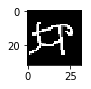

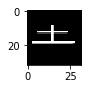

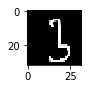

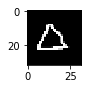

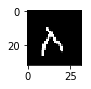

In [31]:
# print(dataset_negative[0].imgs[2].shape)
# # print(im[15])
# # print(im.shape)
# print(dataset_negative[0].imgs[0].shape)
x = [data.imgs for data in dataset_train_positive] 
print(x[0][0].shape)
img_show(np.squeeze(x[0]))
img_show(np.squeeze(x[1]))
img_show(np.squeeze(x[2]))
img_show(np.squeeze(x[3]))
img_show(np.squeeze(x[4]))

In [32]:

def get_next_perfect(dataset_train_positive,dataset_negative,p_size,n_size):
    """
    final batch_size = p_size + n_size * 2
    every dataset_negative should have same imgs leng
    """
    #shuffle
    np.random.shuffle(dataset_train_positive)
    np.random.shuffle(dataset_negative)
    for data in dataset_negative:
        np.random.shuffle(data.imgs)
    for data in dataset_train_positive:
        np.random.shuffle(data.imgs)
    
    
    batch_negative = n_size * 2
#     print('batch_negative ',batch_negative)
    len_n_class = len(dataset_negative)
#     print('len_n_class ',len_n_class)
    len_p_class = len(dataset_train_positive)
#     print('len_p_class ',len_p_class)
    len_n_imgs = len(dataset_negative[0].imgs)
#     print('len_n_imgs ',len_n_imgs)
    len_p_imgs = len(dataset_train_positive[0].imgs)
    
    negative_number = 0
    
    
#     shuffindex = np.random.permutation(len_n)
# #     print(shuffindex)
#     np.random.shuffle(dataset_train_positive)
#     np.random.shuffle(dataset_negative)
    
    for data in dataset_negative:
        negative_number += len(data.imgs)
#         np.random.shuffle(data.imgs)
#     print('negative_number ',negative_number)
    batch_total = negative_number  // batch_negative
#     print('batch_total ',batch_total)
    i_n_class = 0
    i_n_img = 0
    i_p_class = 0
    i_p_img = 0
    
    
    
        
    
    for b in range(batch_total):
        train_x =[]
        train_y = []
        create_negative_imgs = 0
        while create_negative_imgs <= (batch_total * batch_negative) and create_negative_imgs < batch_negative:
            
            # while #如果一次循环没够，需要再次循环
            if i_n_class >= len_n_class:
                    i_n_class = 0
                    i_n_img +=1
                    if (i_n_img+1) *2 >len_n_imgs:
                        i_n_img = 0
#                     print('if i_n_class >= len_n_class i_n_class ',i_n_class)
#                     print('if i_n_class >= len_n_class i_n_img ',i_n_img)
            
            for i in range(i_n_class,len_n_class):
                    
#                 print('for i in range(i_n_class i_n_class ',i_n_class)
#                 print('for i in range(i_n_class i_n_img ',i_n_img)
                train_x += dataset_negative[i_n_class].imgs[i_n_img * 2 : (i_n_img+1) *2]
                train_y += [dataset_negative[i_n_class].label] * 2
                
                i_n_class+=1
                if i_n_class >= len_n_class:
                    i_n_class = 0
                    i_n_img +=1
                    if (i_n_img+1) *2 > len_n_imgs:
                        i_n_img = 0
#                     print('if i_n_class >= len_n_class i_n_class ',i_n_class)
#                     print('if i_n_class >= len_n_class i_n_img ',i_n_img)
            
                create_negative_imgs +=2
                if create_negative_imgs >= batch_negative:
#                     print("create_negative_imgs ok ",create_negative_imgs)
                    break
                    
                
        create_positive_imgs = 0    
        while create_positive_imgs < p_size:
            for i in range(i_p_class,len_p_class):
                print('for i in range(i_p_class     ',i_p_class)
                print('for i in range(i_p_img  ',i_p_img)
                
                train_x += dataset_train_positive[i_p_class].imgs[i_p_img:(i_p_img +1)]
                train_y += [dataset_train_positive[i_p_class].label]
                
                i_p_class+=1
                if i_p_class >= len_p_class:
                    i_p_class = 0
                    i_p_img +=1
                    if (i_p_img +1) > len_p_imgs:
                        i_p_img = 0
                    print('if i_p_class >= len_p_class i_p_class ',i_p_class)
                    print('if i_p_class >= len_p_class i_p_img ',i_p_img)
                
                create_positive_imgs+=1
                if create_positive_imgs >= p_size:
#                     print("create_positive_imgs ok ",create_positive_imgs)
                    break
        
        shuffindex_out = np.random.permutation(len(train_y))
#         print(train_x[0].shape)
        train_x = np.stack(train_x,axis = 0)
#         print('after concat : ',train_x[0].shape)
        train_x = train_x[shuffindex_out]
        train_y = np.array(train_y)[shuffindex_out]
        
        yield train_x,train_y  

In [33]:
dataaaaaaa = get_next_perfect(dataset_train_positive,dataset_negative,4,126)
for x ,y in dataaaaaaa:
    print(y)
    print('x o shape ' ,x.shape,y.shape)
    print("one batch is over")


for i in range(i_p_class      0
for i in range(i_p_img   0
for i in range(i_p_class      1
for i in range(i_p_img   0
for i in range(i_p_class      2
for i in range(i_p_img   0
for i in range(i_p_class      3
for i in range(i_p_img   0
[564   9 139  18 469 128 936 139 883 783 367  36 649 955 678 193 179 514
 558 572 444  24  68 584 594 891 649 262 338 523 572 410 840 731  36 952
 449 347 153 378 856 174 581 812 767 664 325 419 949 611 458 869 945 151
 641 124 906 869 936 323 205 891  51 733 653  58 461 656 924 901 237 653
 700 767 705 134 778 840 761 183 594  57 706 952 900 757 451 627 153 504
 552 731 761 949 127 822 700 706  38 500 156 960 184 601 338  18 547 558
 866 391 150 900  49 193 168 161 222 127 347 183  69 389 760 845 337  31
  96  68 554 469 626 375 344 403 960   9 547 174 508 151 656 124 444 523
 237 150  69 962 589 564 508 333  31 733  24 333 222 812 778  60  38 924
 351 128 760 461 554 955 783 611  84 449 351 945 906 192 609 168 253 883
 627 217 344 856 809 403 514  58 5

[ 45 537 671 719 774 635 694 118 297  41 487 510 187  45  35 241 793 620
 132  52 843 886 171 771 488 824 441 342 416 741 290 277 434 456 233 304
 274 861 298 623 430 520 615 865 929 456 909 622 826 233 604 875 342 958
 831 418 779 137 771 763 488 929 494 620 171 225 613 909 862 903 399 537
  88 471 122 460 793 374 286 640 680 818 615 862 454 826 416 724 861 556
 903 954 893 319  16 305 786 865  41 319 425 268 623 675 267 842 494 598
  16 675 334 251 956 487 958  88  40  50 510 741 261 133 695 956 315 635
 221 831  66 566 481 631 334 824 786 331 418 167 140 640 481 345 886 430
 534 724 331 499 893 842 187 466 261 520 305 374 315 460 864  80 425 719
 879 251 118 363 454 880 933 411 290 173 471 807 366 173 354 268 377 137
 875 499 880 218 297 613 366 566 954  40 680 278 779 140 274 387 765 834
 354 399 565 905  80 534 304 286 411 622 834 695 345 167  66 879 267 413
 864 604 569 905 765 278 218 441 413 221 377 843 133 565 671 225  52 387
 569 298 763  50 132 774 466 694 933 556 277 363 24

In [34]:
def getnext_test(dataset_test_positive,test_class_index):
    
    for data in dataset_test_positive:
        x = np.stack(data.imgs,axis =0)
        y = np.array([test_class_index.index(data.label)] * len(data.imgs))
        yield x,y

In [35]:
dataaaaaaa = getnext_test(dataset_test_positive,test_class_index)
for x ,y in dataaaaaaa:
    print(y)
    print(x.shape,y.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(19, 1, 32, 32) (19,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(19, 1, 32, 32) (19,)
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
(19, 1, 32, 32) (19,)
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
(19, 1, 32, 32) (19,)
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(19, 1, 32, 32) (19,)


In [36]:
def imgs_show_norm(imgs,row,col):
    fig,ax = plt.subplots(nrows=row,ncols=col,sharex=True,sharey=True)
    ax = ax.flatten()
    for i in range(row*col):
        img = imgs[i]
        min = np.min(img)
#         print('min = ',min)
        img = np.subtract(img,min) # 0->
        max = np.max(img)
#         print('max =',max)
        img = np.divide(img,max)
        
        ax[i].imshow(img,cmap='Greys', interpolation='nearest')
    
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()

In [37]:
def img_show_norm(img):
    min_ = np.min(img)
#     print('min = ',min_)
    img = np.subtract(img,min_) # 0->
    max_ = np.amax(a = img,keepdims=False)
#     print('max =',max_)
    img = np.divide(img,max_)  # 0->1
#     print(img)
    plt.figure(figsize=(1,1))
    plt.imshow(img,cmap='Greys',interpolation='nearest')

In [38]:
def img_show(img):
    plt.figure(figsize=(1,1))
    plt.imshow(img,cmap='Greys',interpolation='nearest')
    

In [39]:
def imgs_show(imgs,row,col):
    fig,ax = plt.subplots(nrows=row,ncols=col,sharex=True,sharey=True)
    ax = ax.flatten()
    for i in range(row*col):
        img = imgs[i]
        
        ax[i].imshow(img,cmap='Greys', interpolation='nearest')
    
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()
    
    

In [637]:
def compute_index_logical_equal(inputs,indexs):
    logic_result = (inputs==indexs[0])
    for value in indexs:
        logic_result = np.logical_or(inputs == value,logic_result)
    return logic_result


In [20]:
# nb_digits = class_total_num
net_auto = models.Glow(JsonConfig("hparams/omni_all_bg.json"),test_class_index,is_mean=True,K=8,y_classes=class_total_num)
net_auto.load_state_dict(torch.load('model_glow_ominst_no_split2d_all_bg_8k_2374.pt'))

In [21]:
for param in net_auto.parameters():
    print(param.name)
    

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [21]:

# net_auto = torch.load('model_autoEncode5.pkl')
# net_auto.load_state_dict(torch.load('model_glow_ominst19000.pt'))
# net_auto.load_state_dict(torch.load('model_glow_ominst_no_split2d_4k_4316.pt'))
# net_auto.load_state_dict(torch.load('model_glow_ominst_no_split2d_8k_9000.pt'))
use_cuda = torch.cuda.is_available()
torch.manual_seed(666)
device = torch.device("cuda" if use_cuda else "cpu")
net_auto.to(device)
net_auto.float()


criterion = nn.MSELoss()
optimizer = optim.Adam(net_auto.parameters(),lr=0.0001,weight_decay=1e-5) # decoder don't weight_decay


In [ ]:
#X_train_nor
batch_size = 512
net_auto.train()
for epoch in range(30001):
    #train:
    
    datas =  get_next_perfect(dataset_train_positive,dataset_negative,4,254)
#     datas = getnext(dataset_train_positive,dataset_negative)
    
    trainloss_g = 0
    trainloss_c = 0
    
    for x,y in datas:
        inputs ,lables = torch.from_numpy(x).float().to(device),\
            torch.from_numpy(y).long().to(device)
#         print(torch.sum(lables)) # = 1167
        
        y_onehot = torch.FloatTensor(batch_size, nb_digits).to(device)
        y_onehot.zero_()
        y_onehot.scatter_(1, lables.view(-1,1), 1)
#         print('y_onehot:', y_onehot)


       

        optimizer.zero_grad()
        z, det, y_logits = net_auto(x=inputs, y_onehot=y_onehot)
#         print(z.size())
#         print(det)
        loss_g = models.Glow.loss_generative(det)
        loss_c = models.Glow.loss_class(y_logits,lables)
        print('loss_g = ',loss_g.item())
        print('loss_c =  ',loss_c.item())
        loss = loss_g + loss_c * 0.2
        loss.backward()
        torch.nn.utils.clip_grad_value_(net_auto.parameters(), 5)
        torch.nn.utils.clip_grad_norm_(net_auto.parameters(), 100)
        
        
        trainloss_g += loss_g.item()
        trainloss_c += loss_c.item()
#         print("net_auto.conv_d1 grad:",net_auto.conv_d1.weight.grad)
        
#         print("after net_auto.conv_1 grad:",net_auto.conv1.weight.grad)
        optimizer.step()
        
    print('%d  gloss: %.3f, class loss:%.3f' % (epoch ,  trainloss_g,trainloss_c))
    
    if epoch % 200 == 0 and epoch >0:
        torch.save(net_auto.state_dict(),'model_glow_ominst_no_split2d_all_bg_8k_'+str(epoch)+'.pt')
    


In [41]:
use_cuda = torch.cuda.is_available()
torch.manual_seed(666)
device = torch.device("cuda" if use_cuda else "cpu")
net_auto.to(device)
net_auto.float()
net_auto.eval()

test_loss = 0
correct = 0
test_datas = getnext_test(dataset_test_positive,test_class_index)
for x ,y in test_datas:
        inputs, labels = Variable(torch.from_numpy(x).float()).cuda(), Variable(torch.from_numpy(y).long()).cuda()
        print(labels)
        
        z, det, classify = net_auto(x=inputs, y_onehot=None)
        
        
        
#         _,classify = net_auto(inputs)
        test_loss += F.nll_loss(classify, labels, size_average=False).item() # sum up batch loss
#         print(classify)
        pred = classify.max(1,keepdim=True)[1]
#         print(pred)
        
        correct += pred.eq(labels.view_as(pred)).sum().item()
#         print(correct)
print(correct)
print(correct * 1.0 / 95)
print(test_loss)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')


/usr/local/lib/python2.7/dist-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python2.7/dist-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], device='cuda:0')
tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0')
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')
95
1.0
-1362.39570618


In [ ]:
# net_auto.load_state_dict(torch.load('model_glow_ominst2000.pt'))


# use_cuda = torch.cuda.is_available()
# torch.manual_seed(666)
# device = torch.device("cuda" if use_cuda else "cpu")
# net_auto.to(device)
# net_auto.float()
# net_auto.load_state_dict(torch.load('model_glow_ominst_no_split2d_no_z_mean_no_add_normal1223.pt'))

# net_auto.load_state_dict(torch.load('model_glow_ominst_no_split2d_8k_9000.pt'))
# net_auto.train()
# torch.save(net_auto.state_dict(),'model_glow_ominst_no_split2d_all_bg_8k_2374.pt')

In [1]:
# bbbbb = np.array(dataset_train_positive[1].imgs[1:2])
# print(bbbbb)
# print(dataset_train_positive[1].imgs[1].shape)
criterion = nn.MSELoss(reduction='sum')
t_zeor = torch.ones_like(inputs[0])

NameError: name 'nn' is not defined

In [600]:
posi = np.concatenate(( np.array(dataset_train_positive[4].imgs[0:2])  ,  np.array(dataset_negative[130].imgs[1:3])   ))
labl =  np.array([dataset_train_positive[4].label, dataset_negative[130].label,dataset_negative[130].label])

inputs ,lables = torch.from_numpy(posi).float().to(device),\
            torch.from_numpy(labl).long().to(device)
        
y_onehot = torch.FloatTensor(3, class_total_num).to(device)
y_onehot.zero_()
y_onehot.scatter_(1, lables.view(-1,1), 1)
# print('y_onehot:', y_onehot)
z, det, y_logits = net_auto(x=inputs, y_onehot=y_onehot)


print('z.size() ' ,z.size())
print('y_logits.size() ' ,y_logits.size())
print(y_logits[1][1])

z.size()  torch.Size([3, 64, 4, 4])
y_logits.size()  torch.Size([3, 5])
tensor(-1.9941, device='cuda:0', grad_fn=<SelectBackward>)


In [601]:
obj = z[0]
# print(obj[0])
obj = z[0] 

print(torch.sum(torch.abs(z[2]),dim =(1,2)))
print(torch.sum(torch.abs(z[1]),dim =(1,2)))

print(torch.sum(torch.abs(z[0]),dim =(1,2)))
obj[10:42] = obj[10:42] + 0.8 * (z[1][10:42] - z[2][10:42])

print(obj.size())
obj = obj.view(-1,*obj.size())
print(obj.size())
obj_oneshot = y_onehot[0].view(-1,class_total_num)
print(obj_oneshot.size())
# print(obj_oneshot)
# print(obj[0][0])

tensor([215.5407, 148.6281,  29.0627, 231.0127, 219.1154,  16.7227,  25.4420,
        214.9148,  18.4794, 175.4075, 216.2246, 381.3784,  15.9137,  23.2464,
         24.1812,  29.0564,  27.2408,  31.5290,  28.9314,  19.2645,  22.3886,
         29.5227,  22.7414,  30.6552,  28.0944,  22.3705,  29.9346, 111.5489,
         20.7550,  40.1835,  20.0979, 125.3960,  24.8201,  21.3652,  28.1814,
         25.8832,  20.8016, 318.0601,  47.9517,  19.9476, 411.9918,  22.7557,
         28.8009,  56.0829,  33.3800,  26.9509,  13.8266,  21.5012, 286.0522,
         21.1212,  56.0004, 329.5001,  15.5104, 227.1445,  28.7204,  31.4672,
         21.1640,  17.9550, 192.6242,  92.0396, 688.2089, 198.9326, 306.5248,
        172.7442], device='cuda:0', grad_fn=<SumBackward1>)
tensor([257.8166, 168.2401,  27.5072, 262.6969, 285.3177,  25.1103,  17.4431,
        315.1774,  24.8353, 167.9695, 363.4322, 393.1947,  23.7861,  30.9354,
         23.0518,  33.1741,  25.2876,  36.4146,  31.2756,  19.0108,  21.1368,
    

In [602]:
# z = z.detach().cpu().numpy()
# print(z.size())
# print(z[0][0][0])
x_ = net_auto(z = obj,y_onehot = obj_oneshot,eps_std = None ,reverse=True)


print(x_.size())

print("sum = ",torch.sum(torch.abs(x_[0] - inputs[0])))
# print("abs sum = ",torch.sum(x_[0]- inputs[0]))
c = criterion(x_[0] , inputs[0])
print("criterion  = ",c)

c_self = criterion(inputs[0],t_zeor)
print("self l2 sum  = ",c_self)

print("criterion sum bi  = ",c / c_self)

x_ = torch.clamp(x_,-1,1)
print(x_[0][0][0])
print(inputs[0][0][0])

('learn_top weight requre grad = ', True)
torch.Size([1, 1, 32, 32])
sum =  tensor(257.8656, device='cuda:0')
criterion  =  tensor(429.7140, device='cuda:0')
self l2 sum  =  tensor(461.0750, device='cuda:0')
criterion sum bi  =  tensor(0.9320, device='cuda:0')
tensor([1.0000, 1.0000, 0.9976, 0.9963, 1.0000, 1.0000, 0.9936, 0.9957, 1.0000,
        0.9983, 0.9969, 0.9973, 1.0000, 1.0000, 0.9973, 0.9940, 1.0000, 0.9985,
        1.0000, 1.0000, 0.9927, 1.0000, 0.9994, 1.0000, 0.9972, 0.9913, 0.9837,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000], device='cuda:0')
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       device='cuda:0')


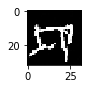

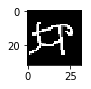

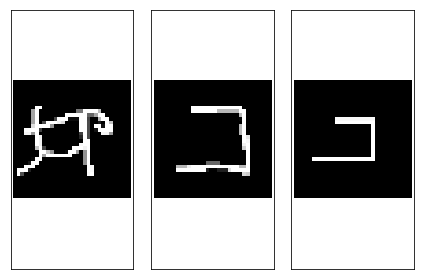

In [656]:
img_show(np.squeeze(x_.data))
img_show(np.squeeze(inputs.data[0]))
imgs_show(np.squeeze(inputs.data),1,3)

In [638]:
nn_index = [-1,1]
def compute_index_logical_equal(inputs,indexs):
    logic_result = (inputs==indexs[0])
    for value in indexs:
        logic_result = np.logical_or(inputs == value,logic_result)
    return logic_result

def compute_index_logical_not_equal(inputs,indexs):
    logic_result = (inputs==indexs[0])
    for value in indexs:
        logic_result = np.logical_or(inputs == value,logic_result)
    return np.logical_not(logic_result)

In [652]:
labels = torch.IntTensor([0,0,1]).long()
eval_index = [1,2]
ddd = compute_index_logical_equal(labels,eval_index)
print(ddd)

g = inputs[ddd]
print(g.size())


tensor([0, 0, 1], dtype=torch.uint8)
torch.Size([1, 1, 32, 32])


In [655]:



t_zeor = torch.ones_like(inputs)

d = inputs-t_zeor
print(d.size())

a = torch.norm(d,2,1)
a = torch.norm(a,2,1)
a = torch.norm(a,2,1) ** 2
print(a )
print(a.size())

b = torch.norm(d,2)
print(b ** 2)

c = criterion(t_zeor[2] , inputs[2])
print(c)

e = a > 100
print(e)
labels=torch.IntTensor([1,2,2])
inddd = labels == 1
print(inddd)
g = inputs[inddd]
print(g.size())

torch.Size([3, 1, 32, 32])
tensor([461.0750, 301.1826, 187.9562], device='cuda:0')
torch.Size([3])
tensor(950.2138, device='cuda:0')
tensor(187.9563, device='cuda:0')
tensor([1, 1, 1], device='cuda:0', dtype=torch.uint8)
tensor([1, 0, 0], dtype=torch.uint8)
torch.Size([1, 1, 32, 32])


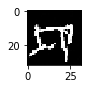

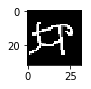

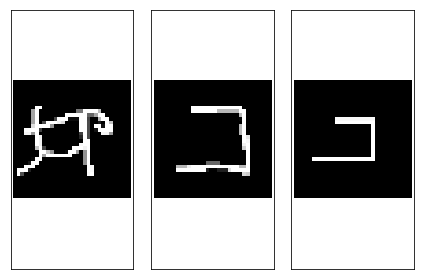